# ME460 Linkages - Prof. Mark Ganter
# 3 position motion generator via ground-pivots  and dyad-standard  equations

Left Char Equation
detleft= 6.8*exp(-1.22173047639603*I)*exp(I*p2) - 4.4*exp(2.8623399732707*I)*exp(I*p2) + 5.4*exp(1.65806278939461*I)*exp(I*p3) - 6.8*exp(-1.48352986419518*I)*exp(I*p3) + 4.4*exp(0.506145483078356*I) - 5.4*exp(-0.436332312998582*I)

left char solution p2 & p3 -279.88858306656635 -223.35078591423058
abs(left_char)= 6.01947964270650e-9

LEFT DYAD EQ.s
posl2= d1*(-1 + exp(-4.88497731325323*I))*exp(I*t1) + d2*(-1 + exp(-2.35619449019234*I))*exp(I*t2) - 5.4*exp(1.65806278939461*I) + 6.8*exp(0.872664625997165*I)
posl3= d1*(-1 + exp(-3.8982066011203*I))*exp(I*t1) + d2*(-1 + exp(-2.0943951023932*I))*exp(I*t2) - 4.4*exp(2.8623399732707*I) + 6.8*exp(0.872664625997165*I)

left 3pos solution r1,t1,r2,t2 = 6.39799207907092 32.44429148594491 -2.05287666438508 -59.93689230650891
abs(posl2)= 2.91e-8
abs(posl3)= 3.36e-8

Right Char Equation
detright= 4.0*exp(I*s2) + 6.8*exp(-1.22173047639603*I)*exp(I*s2) - 4.4*exp(2.8623399732707*I)*exp(I*s2) - 4.0*exp(-2.0943951023932*I)*exp(I*s2) - 

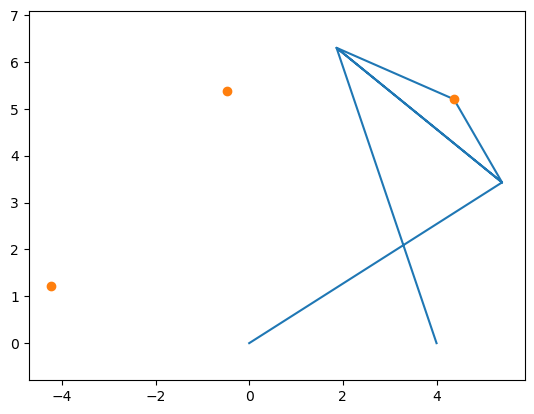

In [18]:
##%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
p2,p3,p4 = symbols("p2 p3 p4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

#Set up origins, critical points, to then calculate p's and q'S
#origins
oa = 0 + 0*I
ob = 4 + 0 *I
#cs and angles
c1 = 6.8*exp(radians(50)*I)
c2 = 5.4*exp(radians(95)*I)
c3 = 4.4*exp(radians(164)*I)

# set up P's & Q's
pp1 = c1 -oa
pp2 = c2 -oa
pp3 = c3 -oa

qq1 = c1 - ob
qq2 = c2 - ob
qq3 = c3 - ob

# set up deltas
del2 = pp2-pp1
del3 = pp3-pp1

# set up the gamma's 
g2 = -radians(90+45)
g3 = -radians(45+90-15)


# LEFT SIDE #

# now try characteristic polynomial approach
print("Left Char Equation")
detleft = Matrix([[1, 1, pp1], [exp(I*p2),exp(I*g2),pp2],[exp(I*p3),exp(I*g3),pp3]]).det()
print("detleft=",detleft)
print()

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detleft),im(detleft)), (p2, p3), (radians(-7),radians(10)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution p2 & p3",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detleft.evalf(subs={p2:ans[0],p3:ans[1]}) ))
print()

p2a = ans[0]
p3a = ans[1]

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2a)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3a)-1) + r2*(exp(I*g3)-1) - del3
print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d2, t2), (5,radians(10),2 ,radians(-50)), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("left 3pos solution r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()


# RIGHT SIDE #
# now try characteristic polynomial approach
print("Right Char Equation")
detright = Matrix([[1, 1, qq1], [exp(I*s2),exp(I*g2),qq2],[exp(I*s3),exp(I*g3),qq3]]).det()
print("detright=",detright)
print()

#next solve right characteristic equation for s3 and s4
ans = nsolve((re(detright),im(detright)), (s2, s3), (radians(33),radians(42)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution s2 & s3",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detright.evalf(subs={s2:ans[0],s3:ans[1]}) ))
print()

s2a = ans[0]
s3a = ans[1]

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2a)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3a)-1) + r4*(exp(I*g3)-1) - del3

print("posr2=",posr2)
print("posr3=",posr3)
print()

ans = nsolve((re(posr2),im(posr2),re(posr3),im(posr3)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("right 3pos solution  r3,t3,r4,t4 =",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(posr2)=",N(abs(posr2.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ans[0],t3:ans[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ans[2],t4:ans[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3


print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3))
print()
print("pp1 =",pp1,"pp2 =",pp2,"pp3 =",pp3)
print("qq1 =",qq1,"qq2 =",qq2,"qq3 =",qq3)
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()
print("phi2 =",degrees(p2a),"phi3 =",degrees(p3a))
print("psi2 =",degrees(s2a),"psi3 =",degrees(s3a))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = pp1-evalr2-evalr1
evalA = pp1-evalr2
evalB = pp1-evalr4
c = pp1
evalOb = pp1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",pp1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(pp1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(pp1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(pp1),re(pp2),re(pp3)],[im(pp1),im(pp2),im(pp3)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()



In [19]:
#This linkage simulation script is made by Leviticus Rhoden, build off of Mark Gartner's Base
#Linkages Graphics 2.1

#This version takes in Ganter synthesis variable names and animates

#%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np

from graphics import *
import matplotlib.pyplot as plt

#graphics screen window and screen coordinates
win = GraphWin("Linkages",1500,1000)
win.setCoords(-20,-20,40,20)

#set up all the variables and vectors
#Set up unknowns, 
t0, t1, t2, t3, t4, t5, t6 = symbols("t0 t1 t2 t3 t4 t5 t6", real=True)
unkown = [t2, t3, t4, t5]
inputVar = t1
#setup ground points
g = []
g.append(evalOa)
g.append(evalOb)
#set up linkage equations
r = []
r.append(abs(evalr1)*exp(I*t1))
r.append(abs(evalr2)*exp(I*t2))
r.append(abs(evalr3)*exp(I*t3))
r.append(abs(evalr4)*exp(I*t4))
r.append(abs(evalr5)*exp(I*t5))

#set up static Graphics (Ground, special areas etc.)
gPt = []
for i in g:
    gPt.append(Point(re(i),im(i)))
print()
#create graphics points for the ground pivots
#goA = Point(0,0)
#goB = Point(re(r1),im(r1))

#write out the equations for linkage (looks just like what we put on the board)


#Initial Guess
#This guess should be good for the starting angles. Then the solved angles will be used to seed next loop
guess = (radians(degrees(arg(evalr2))), radians(degrees(arg(evalr3))), radians(degrees(arg(evalr4))), radians(degrees(arg(evalr5))))


run = True
#i is start angle, step is degrees change every time
input = (degrees(arg(evalr1)))
step = -1

Circle(Point(re(c1),im(c1)), 0.2).draw(win).setOutline('red')
Circle(Point(re(c2),im(c2)), 0.2).draw(win).setOutline('red')
Circle(Point(re(c3),im(c3)), 0.2).draw(win).setOutline('red')
while run == True:
    # compute loop eq with t2 substituted 
    equations = []
    equations.append((g[1] - g[0]) - (r[0] + r[1] - r[3] - r[2]))
    equations.append((g[1] - g[0]) - (r[0] + r[4] - r[2]))
    equations = [equations[n].subs(inputVar,radians(input)) for n in range(0,len(equations),1)]
    split_eq = []
    for n in range(0,len(equations),1):
        split_eq.append(re(equations[n]))
        split_eq.append(im(equations[n]))
        
    ans = nsolve(split_eq, unkown, guess, verify=False)
    
    #print(eq1_slv.evalf(subs = { tuple(unkown):tuple(ans) }))
    eq_slv = split_eq[0]
    for j in range(0,len(ans),1):
        eq_slv = eq_slv.subs(unkown[j],ans[j])
    
    if abs(eq_slv) > 0.00001:
        step = -1 * step
    print(abs(eq_slv))
    guess = ans

    #substitute solutions into r-vectors to get numerical values
    v = []
    for j in r:
        eq = j
        for k in range(0,len(ans),1):
            eq = eq.subs(unkown[k],ans[k])
        eq = eq.subs(inputVar,radians(input))
        print(eq)
        v.append(eq)
    print(v)
    print(gPt)
    #create graphics points for mechanism points A, B & C.
    p = []
    p.append(Point(re(g[0] + v[0]),im(g[0] + v[0])))
    p.append(Point(re(g[0] + v[0] + v[1]),im(g[0] + v[0] + v[1])))
    p.append(Point(re(g[0] + v[0] + v[4]),im(g[0] + v[0] + v[4])))
    #Levi Inserted window clear
    for item in win.items[:]:
        if str(type(item)) == "<class 'graphics.Line'>":
            item.undraw()
    win.update()

    #create graphic lines and draw them.
    # line = Line(goA,gptA)
    # line.draw(win)
    Line(gPt[0],p[0]).draw(win).setOutline('red')
    Line(p[0],p[2]).draw(win)
    Line(p[0],p[1]).draw(win)
    Line(p[1],p[2]).draw(win)
    Line(p[2],gPt[1]).draw(win)
    
    #Line().draw(win)

    p[1].draw(win)

    input += step

#graphics
win.getMouse() #this waits until user clicks mouse
win.close()


0
6.4*exp(0.5662841796875*I)
2.05*exp(2.09538174441268*I)
6.66*exp(1.89726009129475*I)
2.74*exp(-0.412527024120254*I)
4.56*exp(2.45899252045026*I)
[6.4*exp(0.5662841796875*I), 2.05*exp(2.09538174441268*I), 6.66*exp(1.89726009129475*I), 2.74*exp(-0.412527024120254*I), 4.56*exp(2.45899252045026*I)]
[Point(-0.00013800413153219893, 0.00011783820905009179), Point(4.000350277118468, 0.00011783820905009179)]
4.44089209850063e-16
6.4*exp(0.548830887167557*I)
2.05*exp(2.05021378277391*I)
6.66*exp(1.86689535928735*I)
2.74*exp(-0.457694985759021*I)
4.56*exp(2.4138245588115*I)
[6.4*exp(0.548830887167557*I), 2.05*exp(2.05021378277391*I), 6.66*exp(1.86689535928735*I), 2.74*exp(-0.457694985759021*I), 4.56*exp(2.4138245588115*I)]
[Point(-0.00013800413153219893, 0.00011783820905009179), Point(4.000350277118468, 0.00011783820905009179)]
0
6.4*exp(0.531377594647613*I)
2.05*exp(2.00409669694825*I)
6.66*exp(1.83551822313384*I)
2.74*exp(-0.503812071584678*I)
4.56*exp(2.36770747298584*I)
[6.4*exp(0.53137759

GraphicsError: Can't draw to closed window